# Hailee Kiesecker
# Colab : None
# PS3 ML Spring 2021

# Question 1 (15 pts) (Scikit Allowed) SVM

To classify iris dataset (Iris-Versicolor vs. others) in the best way, you have to create an algorithm able to
determine (with the k-fold cross validation) what is the best space transformation (among rbf_kernel, polynomial
features, and polynomial kernel) and its hyperparameters. Each transformation has its own parameters
rbf_kernel->gamma, polynomial-features-> degree, polynomial_kernel ->(gamma, degree). The performance
must be tested of the entire algorithm with another K-fold cross-validation (please use then trainset, validationset,
and testset).
Hint: use 3 k-folds.


In [ ]:
# imports 
import numpy as np 
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# set up data 
X, y = datasets.load_iris(return_X_y=True)
scaler = StandardScaler()
scaler.fit_transform(X)
# make y into either Versicolor or not
y = np.where(y == 1, 1, 0)

In [ ]:
# keeping out a test set (X/y_val) for final model evaluation
X, X_val, y, y_val = train_test_split(X, y, test_size=0.2, random_state=0) #holding out 20% of data for final model 

kf = KFold(n_splits=3)

In [ ]:
#Display later
#===================================
# best poly kernel based on F1
bestF1_plyK = 0
bestModel_plyK = None

# best rbf kernel based on F1
bestF1_rbf = 0
bestModel_rbf = None

#best poly feature based on F1
bestF1_plyF = 0
bestModel_plyF = None
#===================================

#we have data splitting into 3 parts ===========================================
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  # find the best hyper parameter of the fold

  #poly kernel -- gamma and degree----------------------------------------------
  plyK_param = {'degree': [1,7,14,27,34],
                'C':[0.01, 0.15, 0.2, 0.25, 0.4],  # changed gamma to C
                'kernel': ['poly']
                }
  plyK_grid = GridSearchCV(svm.SVC(), plyK_param)
  plyK_grid.fit(X_train, y_train) # we now have best hyper-parameters for this fold
  print("Best poly Kernel: {0}, using {1}".format(plyK_grid.best_score_, plyK_grid.best_params_))

  #rbf kernel - just gamma------------------------------------------------------
  rbf_param = {'gamma': [0.1, 0.2, 0.4, 6.0, 10],
                'C':[1,10,100],
                'kernel': ['rbf'] }
  rbf_grid = GridSearchCV(svm.SVC(), rbf_param)
  rbf_grid.fit(X_train, y_train) # we now have best hyper-parameters for this fold
  print("Best rbf Kernel: {0}, using {1}".format(rbf_grid.best_score_, rbf_grid.best_params_))

  #poly feature - just degree ( not sure if this is working)--------------------
  plyF_param = {'degree': [1,2,3,4,5,6,7,8,9,10,14,27,34] }
  plyF_grid = GridSearchCV(PolynomialFeatures(),
                         plyF_param, 
                         scoring='neg_mean_squared_error') 
  #X_poly = plyF_grid.fit(X_train, y_train)

  #best hyper parameter F1 score ===============================================
  for a, b in kf.split(X_train):
    X_train_splitsplit, X_test_splitsplit = X[a], X[b]
    y_train_splitsplit, y_test_splitsplit = y[a], y[b]

    #poly kernel testing -------------------------------------------------------
    clf_plyK = svm.SVC(**plyK_grid.best_params_)
    clf_plyK.fit(X_train_splitsplit, y_train_splitsplit)
    y_pred_plyK = clf_plyK.predict(X_test_splitsplit)
    f1_plyK = f1_score(y_test_splitsplit, y_pred_plyK, average='macro')
    print("Best poly Kernel F1 score: {0}, using {1}".format(f1_plyK, plyK_grid.best_params_))
    # storing best values for poly kernel
    if bestF1_plyK < f1_plyK:
      bestF1_plyK = f1_plyK
      bestModel_plyK = plyK_grid.best_params_

    #rbf kernel ----------------------------------------------------------------
    clf_rbf = svm.SVC(**rbf_grid.best_params_)
    clf_rbf.fit(X_train_splitsplit, y_train_splitsplit)
    y_pred_rbf = clf_rbf.predict(X_test_splitsplit)
    f1_rbf = f1_score(y_test_splitsplit, y_pred_rbf, average='macro')
    print("Best rbf Kernel F1 score: {0}, using {1}".format(f1_rbf, rbf_grid.best_params_))
    # storing best values for rbf kernel
    if bestF1_rbf < f1_rbf:
      bestF1_rbf = f1_rbf
      bestModel_rbf = rbf_grid.best_params_

    #poly Feature (not sure if this is working) --------------------------------
    #clf_plyF= X_poly.fit(X_train_splitsplit, y_train_splitsplit)
    #predict =clf_plyF.fit_transform(X_test_splitsplit)
    #clf = linear_model.LinearRegression()
    #clf.fit(X_poly, predict)
    #y_pred_plyK = clf.predict(predict)
    #F1_plyF = f1_score(y_test_splitsplit, y_pred_plyK, average='macro')
    # storing best values for rbf kernel
    #if bestF1_plyF < F1_plyF:
      #bestF1_plyF = F1_plyF
      #bestModel_plyF = plyF_grid.best_params_

Best poly Kernel: 0.975, using {'C': 0.01, 'degree': 7, 'kernel': 'poly'}
Best rbf Kernel: 0.9875, using {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best poly Kernel F1 score: 0.8712241653418125, using {'C': 0.01, 'degree': 7, 'kernel': 'poly'}
Best rbf Kernel F1 score: 0.9570747217806042, using {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best poly Kernel F1 score: 0.961038961038961, using {'C': 0.01, 'degree': 7, 'kernel': 'poly'}
Best rbf Kernel F1 score: 0.9205882352941177, using {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best poly Kernel F1 score: 0.9174603174603174, using {'C': 0.01, 'degree': 7, 'kernel': 'poly'}
Best rbf Kernel F1 score: 1.0, using {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best poly Kernel: 0.9125, using {'C': 0.4, 'degree': 7, 'kernel': 'poly'}
Best rbf Kernel: 0.925, using {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
Best poly Kernel F1 score: 0.8712241653418125, using {'C': 0.4, 'degree': 7, 'kernel': 'poly'}
Best rbf Kernel F1 score: 0.9570747217806042, using {'C': 1, 'ga

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
avgRecall_rbf =0 
avgRecall_plyK =0 
avgPre_rbf =0 
avgPre_plyK =0
avgF1_rbf =0 
avgF1_plyK =0  
#test on validation set
for train_index, test_index in kf.split(X_val):
  X_train, X_test = X_val[train_index], X_val[test_index]
  y_train, y_test = y_val[train_index], y_val[test_index]

  clf_polyKernel = svm.SVC(**bestModel_plyK)
  clf_rbf = svm.SVC(**bestModel_rbf)

  clf_polyKernel.fit(X_train, y_train)
  clf_rbf.fit(X_train, y_train)

  y_pred_plyK = clf_polyKernel.predict(X_test)
  y_pred_rbf = clf_rbf.predict(X_test)

  avgRecall_rbf = avgRecall_rbf + recall_score(y_test, y_pred_rbf, average='micro')
  avgRecall_plyK = avgRecall_plyK + recall_score(y_test, y_pred_plyK, average='micro')

  avgPre_rbf = avgPre_rbf + precision_score(y_test, y_pred_rbf, average='micro')
  avgPre_plyK = avgPre_plyK + precision_score(y_test, y_pred_plyK, average='micro')

  avgF1_rbf = avgF1_rbf + f1_score(y_test, y_pred_rbf, average='micro')
  avgF1_plyK = avgF1_plyK + f1_score(y_test, y_pred_plyK, average='micro')


In [ ]:
#avg metrics for rbf kernel
print("rbf kernel  ; avg recall",avgRecall_rbf/3, "avg precsion" ,avgPre_rbf/3, "avg F1",avgF1_rbf/3 , "using:" ,bestModel_rbf)
#avg metrics for poly kernel
print("poly kernel ; avg recall",avgRecall_plyK/3, "avg precsion" ,avgPre_plyK/3, "avg F1",avgF1_plyK/3, "using:", bestModel_plyK)

rbf kernel  ; avg recall 0.9666666666666667 avg precsion 0.9666666666666667 avg F1 0.9666666666666667 using: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
poly kernel ; avg recall 0.8666666666666666 avg precsion 0.8666666666666666 avg F1 0.8666666666666666 using: {'C': 0.4, 'degree': 7, 'kernel': 'poly'}


# Question 1 : Reflection
From our current implementation it appears the best space transformation amoung rbf and poly kernel is RBF with hyper perameters being C: 10 , Gamma 0.1

Current testing on polynomial features is not working, if time permits going back and studying how to implement polynomial features fully will be done. Currently it is implemented but in a way that causes errors for the overall structure and will continue to be commented out.

# Question 2
Write the explicit constraints (without using any vectorial notation, as a summation of single variables multiplied
by a constant + bias term) of the Support Vector Machine to correctly classify iris dataset (Iris-Versicolor vs.
others). Use 5 points in Iris-Versicolor, 2 points for iris-setosa, and 3 points for iris Virginia.
Please show the points you selected and after the constraints.

bias for ver 4.692000000764443
bias for rest 7.440000000764385
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   numeric  10 non-null     float64
 1   type     10 non-null     |S80   
dtypes: bytes640(1), float64(1)
memory usage: 1008.0 bytes
None


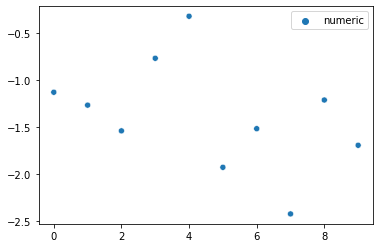

In [ ]:
#for a data point [0.2,0.2,1.5,6.8, '0'] -> \sum(0.2*W1 + 0.2*W2+1.5*W3+6.8*W4) + b < -1
# set up data 
iris = pd.read_csv("/iris.csv")
X, y = datasets.load_iris(return_X_y=True)
y = np.where(y == 1, 1, 0)
scaler = StandardScaler()
scaler.fit_transform(X)
# getting weights
test = svm.SVC(kernel='linear')
test.fit(X, y)
#print(test.coef_)

#==========================================================================
# when 1 vs 1
#[-0.10016464 -2.10358464  0.61654795 -1.45218908]
#==========================================================================
# when 1 vs 2 
#[-0.04625854  0.5211828  -1.00304462 -0.46412978] # 0Iris-setosa
# [-0.00722313  0.17894121 -0.53836459 -0.29239263] # 1Iris-versicolor
# [ 0.59549776  0.9739003  -2.03099958 -2.00630267] # 2Iris-virginica
#==========================================================================

w1 = -0.10016464
w2 = -2.10358464
w3 = 0.61654795
w4 = -1.45218908
b = None # find bias

# equation 1 point 1 Iris-versicolor---------------------	
ver1 = (5.7*w1+	2.8*w2+	4.1*w3+	1.3*w4) 
# point 2 
ver2 = (6.2*w1+	2.9*w2+	4.3*w3+	1.3*w4)
#point 3 
ver3 = (5.6*w1+	3*w2+	4.1*w3+	1.3*w4) 
# point 4
ver4 = (6*w1+	2.7*w2+	5.1*w3+	1.6*w4) 
#point 5 
ver5 = (5.6*w1+ 2.5*w2+	3.9*w3+	1.1*w4)

# equation 1 point 1 	Iris-virginica---------------------			
vir1 = (6.8*w1+	3.2*w2+	5.9*w3+	2.3*w4)
#point 2
vir2 = (6.3*w1+	2.7*w2+	4.9*w3+	1.8*w4)
#point 3 
vir3 = (6.4*w1+	3.1*w2+	5.5*w3+	1.8*w4)		

#equation 1 point 1 Iris-setosa--------------------------
set1 = (4.6*w1+	3.2*w2+	1.4*w3+	0.2*w4)	
#point 2
set2 = (4.3*w1+	3*w2+	1.1*w3+	0.1*w4)																																					

# function to find the bias that satifies the constraint _ver
done = False
def findBias_Ver(equation, bias):
  while (done == False):
    if (equation+bias <-1):
      break
    else:
      bias = bias - 0.01
  return bias
# function to find the bias that satifies the constraint _rest
done1 = False
def findBias_rest(equation, bias):
  while (done1 == False):
    if (equation+bias>=-1 and equation+bias <= 1):
      break
    else:
      bias = bias - 0.01
  return bias
		
#calc of bias's
b1 = (findBias_Ver(ver1, 1000))
b2 = (findBias_Ver(ver2, 1000))
b3= (findBias_Ver(ver3, 1000))
b4 = (findBias_Ver(ver4, 1000))
b5 = (findBias_Ver(ver5, 1000))
b1_rest = (findBias_rest(vir1, 1000))
b2_rest = (findBias_rest(vir2, 1000))
b3_rest = (findBias_rest(vir3, 1000))
b4_rest = (findBias_rest(set1, 1000))
b5_rest = (findBias_rest(set2, 1000))
# average bias of each class
bias_ver = (b1+b2+b3+b4+b5) / 5
bias_rest = (b1_rest+b2_rest+b3_rest+b4_rest+b5_rest)/5

print("bias for ver" ,bias_ver)
print("bias for rest",bias_rest)
# point creation 
p1 = ver1+bias_ver
p2 = ver2+bias_ver
p3 = ver3+bias_ver
p4 = ver4+bias_ver
p5 = ver5+bias_ver
p1r = set1+bias_ver
p2r = set2+bias_ver
p3r = vir1+bias_ver
p4r = vir2+bias_ver
p5r = vir3+bias_ver

#plotting of chosen points
data = ([p1,"ver"],[p2,"ver"],[p3,"ver"],[p4,"ver"],[p5,"ver"],[p1r,"rest"],[p2r,"rest"],[p3r,"rest"],[p4r,"rest"],[p5r,"rest"])
df = pd.DataFrame(data ,columns = ['numeric','type'])
df['type']=df['type'].astype('|S80')
#print(df.info())
sns.scatterplot(data=df)

# Question 2 Reflection 

Overall I had a hard time with this part of the assignment. I could watch videos on SVM and read powerpoints on how they worked but when it came down to implementing the math I didnt fully understand how everything tied together. I tried to implement what I thought was the correct way by getting the weights from each feature, but mathmatically I didnt fully understand how to do that so I just used a built in function of SVM. I also wasnt sure if I should go through every single data entry and make points and then choose the most optimal points, or if random was alright, so I just went with random.

While I do not believe I did this a fully correct way our end points are seperated into two groups in the displayed scatter plot. Saddly I could not get it to color these dots into different Hues, probably a simple error on my end in creation of the data... actually I am going to try a simple fix bellow: ---

The Quick fix ended up also having the same simple error. 

In [ ]:
#data = ([ver1,b1,"ver"],[ver2,b2,"ver"],[ver3,b3,"ver"],[ver4,b4,"ver"],[ver5,b5,"ver"],[vir1,b1_rest,"rest"],[vir2,b2_rest,"rest"],[vir3,b3_rest,"rest"],[set1,b4_rest,"rest"],[set2,b5_rest,"rest"])
##df = pd.DataFrame(data ,columns = ['x','y','type'])
##sns.scatterplot(data=df, hue = 'type')

# Extra credit (5 pts)
An unbalanced dataset (e.g. 95% vs 5%) can be problematic even in the training phase. The learned function can
be trivial, e.g. always predicting one class. A possible solution can have a weight for each point in the way that
making a mistake in the minority class will count more w.r.t. the other. Please redefine the likelihood of the
logistic regression to consider these weights for each point. Please compute the log-likelihood and its derivatives.
In addition, add to the negative log-likelihood the norm of W (sum of the square of each component) and compute
the derivatives. You should not expect class_weight parameters and SMOTE to give the exact same results
because they are different methods.
Class weights directly modify the loss function by giving more (or less) penalty to the classes with more (or less)
weight. In effect, one is basically sacrificing some ability to predict the lower weight class (the majority class
for unbalanced datasets) by purposely biasing the model to favor more accurate predictions of the higher
weighted class (the minority class).
Oversampling and undersampling methods essentially give more weight to particular classes as well (duplicating
observations duplicates the penalty for those particular observations, giving them more influence in the model
fit), but due to data splitting that typically takes place in training this will yield slightly different results as well.
SMOTE creates new observations of the minority class by randomly sampling from a set of "similar" minority
class observations. Synthesized observations are computed based on adding a random percentage of the
difference between two randomly chosen "similar" observations for each coordinate (i.e. column). Similar
observations are defined typically using the k most closest neighbors to a particular observation of the minority
class. This means that, depending on the value of k chosen, as well as numerous other factors such as how similar
your observations are in general, the distance measure, etc. SMOTE may or may not be useful for your problem.
Methods that deal with class imbalance do not all work the same and is a large area of study. It appears you have
noticed that the class weight method is more effective, which is why any sort of method chosen in addressing
any potential class imbalance problem needs to be wrapped within a model validation scheme to see if the
particular method (or really, using any method at all) yields any benefit.

# The Basic Question
Please redefine the likelihood of the
logistic regression to consider these weights for each point. Please compute the log-likelihood and its derivatives.
In addition, add to the negative log-likelihood the norm of W (sum of the square of each component) and compute
the derivatives. You should not expect class_weight parameters and SMOTE to give the exact same results
because they are different methods

In [ ]:
#Function to normalize the weights of a given set of features using loglikelyhood, derv, Logistic regression
def LogLike_wDIR(weight):

  #takes in a weight 

  # computes Log likelyhood

  # takes derivitives 

 return weight

In [ ]:
#Function to Modify the weights with normalization-ish
def SumSquare (W):
  #add Negate of Log Like

  # compute Derivitives 
  return W